Explore correlations between variables such as rating and cost, distance and delivery time, etc., to uncover potential relationships. 

What will affect the Ratings? 

- delivery cost
- delivery time


In [32]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
sb.set() # set the default Seaborn style for graphics
import seaborn as sns

In [33]:
data = pd.read_csv('./Datasets/Cleaned Grab SG Restaurants.csv')
data.head()

,name,address,cuisine,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,total opening time hours
0,Texas Chicken,Texas Chicken - VivoCity,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,75.75
1,Subway,Subway - Vivocity,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,49.00
2,LiHO Tea,LiHO Tea - Vivo City,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,64.75
3,Wingstop,Wingstop - VivoCity,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,70.00
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,73.50


In [34]:
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 16136
Number of columns: 16


In [35]:
# Drop rows with any null values
data.dropna(inplace=True)

# Display the first few rows of the DataFrame after removing null rows
data.head()

,name,address,cuisine,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,total opening time hours
0,Texas Chicken,Texas Chicken - VivoCity,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,75.75
1,Subway,Subway - Vivocity,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,49.00
2,LiHO Tea,LiHO Tea - Vivo City,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,64.75
3,Wingstop,Wingstop - VivoCity,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,70.00
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,73.50


In [36]:
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8084
Number of columns: 16


<!-- ## separate those with available promo with & without -->

## ratings vs delivery cost

In [37]:
rating.describe()

NameError: name 'rating' is not defined

In [38]:
delivery_cost.describe()

NameError: name 'delivery_cost' is not defined

NameError: name 'rating' is not defined

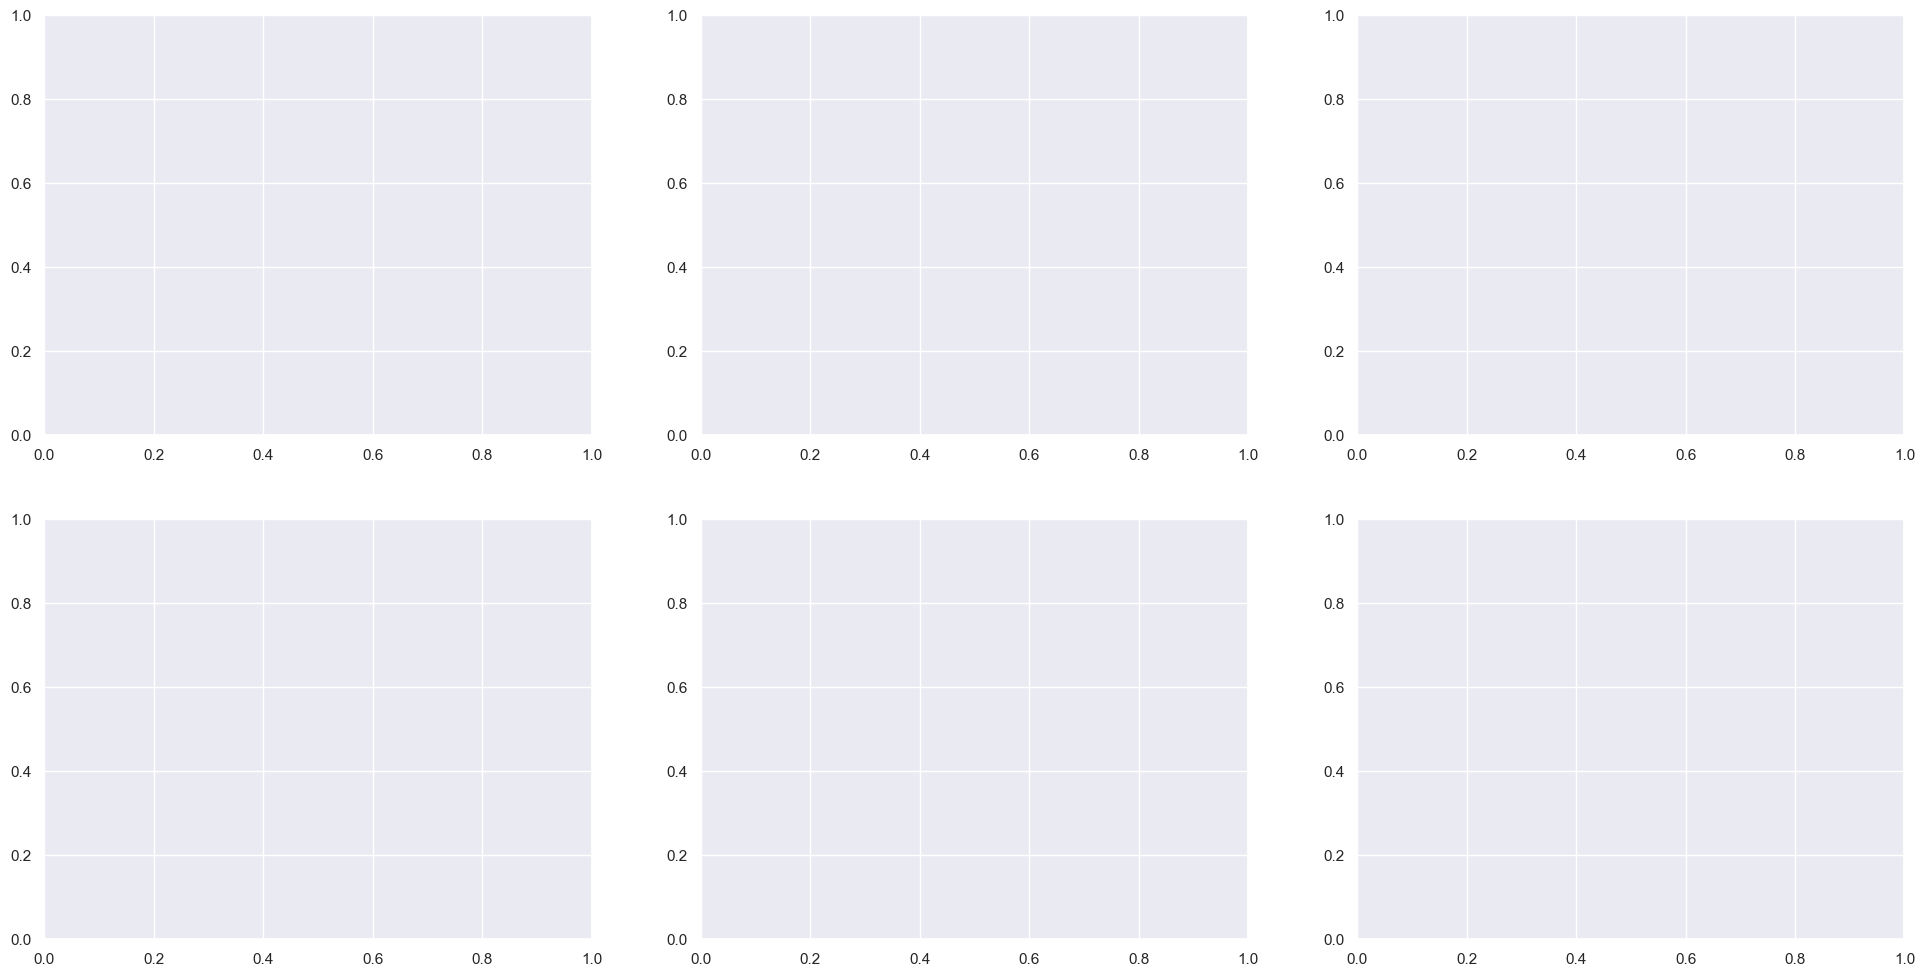

In [39]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = rating, orient = "h", ax = axes[0,0])
sb.histplot(data = rating, ax = axes[0,1])
sb.violinplot(data = rating, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = delivery_cost, orient = "h", ax = axes[1,0])
sb.histplot(data = delivery_cost, ax = axes[1,1])
sb.violinplot(data = delivery_cost, orient = "h", ax = axes[1,2])

In [ ]:
# Create DataFrame for 'rating' column
rating = pd.DataFrame(data['rating'])

# Create DataFrame for 'delivery_cost' column and divide by 100
delivery_cost = pd.DataFrame(data['delivery_cost'] / 100)

# Combine the two DataFrames horizontally
result = pd.concat([rating, delivery_cost], axis=1)

# Display the resulting DataFrame
result.head()

In [ ]:
jointDF = pd.concat([rating, delivery_cost], axis = 1).reindex(rating.index)
sb.jointplot(data = jointDF, x = "rating", y = "delivery_cost", height = 12)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Display the correlation matrix
print(correlation_matrix)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## since the correlation is near 0, this analysis shows that there is no apprarent linear relaionship between the variables

## ratings vs delivery time 

In [ ]:
delivery_time.describe()

In [ ]:
rating.describe()

In [ ]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = rating, orient = "h", ax = axes[0,0])
sb.histplot(data = rating, ax = axes[0,1])
sb.violinplot(data = rating, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = delivery_time, orient = "h", ax = axes[1,0])
sb.histplot(data = delivery_time, ax = axes[1,1])
sb.violinplot(data = delivery_time, orient = "h", ax = axes[1,2])

In [ ]:
# Create DataFrame for 'rating' column
rating = pd.DataFrame(data['rating'])

# Create DataFrame for 'delivery_cost' column and divide by 100
delivery_cost = pd.DataFrame(data['delivery_time'])

# Combine the two DataFrames horizontally
result = pd.concat([rating, delivery_cost], axis=1)

# Display the resulting DataFrame
result.head()

In [ ]:
jointDF = pd.concat([rating, delivery_time], axis = 1).reindex(rating.index)
sb.jointplot(data = jointDF, x = "rating", y = "delivery_time", height = 12)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Display the correlation matrix
print(correlation_matrix)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Since the correlation coefficient is very close to 0 (-0.09194), it suggests that there is a weak negative linear relationship between the variables.

## ratings and distance 

In [ ]:
# Create DataFrame for 'rating' column
rating = pd.DataFrame(data['rating'])

# Create DataFrame for 'delivery_cost' column and divide by 100
lon = pd.DataFrame(data['lon'])
lat = pd.DataFrame(data['lat'])
radius = pd.DataFrame(data['radius'])

# Combine the two DataFrames horizontally
result = pd.concat([rating, lon, lat, radius], axis=1)

# Display the resulting DataFrame
result.head()

In [ ]:
correlation_coefficient = data['radius'].corr(data['rating'])
correlation_coefficient

## ratings and opening hours 

In [ ]:
rating.describe()

In [ ]:
delivery_time_columns = data['total opening time hours'].columns
